In [2]:
import numpy as np
import tensorflow as tf
import os

In [3]:
import matplotlib.pyplot as plt
import _pickle
import time

In [4]:
# todo
# compare likelihoods
# test with less popular features
# use different priors
# multiclass logistic regression significance tests
# fit mixture of gaussian vs gaussian
# check if weight activity killed
# tansfer learning for new class and robustness

In [22]:

file = open('mean.pkl', "rb")
gaussian_means = _pickle.load(file) 
file = open('covariance.pkl', "rb")
gaussian_covariances = _pickle.load(file)

with open('turker_prob.pkl', "rb") as handle:
    turkers = _pickle.load(handle) 

with open('test_set_17_227.pkl', "rb") as handle:
    test_set = _pickle.load(handle) 
    
with open('turker_count.pkl', "rb") as handle:
    turker_count= _pickle.load(handle) 

In [23]:
bad_samples = {2:{}, 
               3:{'Matt Damon':[1]}, 
               4:{'Matt Damon':[1], 'Cheryl Hines': [11]},
               5:{'Matt Damon':[1, 10]},
               6:{},
               7:{'Alec Baldwin':[3, 8], 'Kristin Chenoweth':[0]},
               8:{},
               9:{'Angie Harmon': [1]},
               10:{'Matt Damon':[1]},
               11:{}
              }

In [24]:
male_actors = ['Daniel Radcliffe', 'Gerard Butler', 'Michael Vartan', 'Alec Baldwin', 'Steve Carell',\
                    'Bill Hader', 'Fran Drescher', 'Matt Damon', 'Nicolas Cage']
female_actors = ['Cheryl Hines', 'Selena Gomez', 'Angie Harmon', 'Lorraine Bracco', 'Kristin Chenoweth',\
                      'America Ferrera', 'Anne Hathaway', 'Jennifer Aniston']
gender ={}
for actor in male_actors:
    gender[actor] = 'male'
for actor in female_actors:
    gender[actor] = 'female' 

In [30]:
# creating turker count per image
features = ['beard', 'eye brows', 'eyes', 'hairline', 'lips', 'moustache', 'nose']
features = ['eye brows', 'eyes', 'lips', 'nose']
actor_stats = {}
for actor in test_set:
    actor_stats[actor] = []
    for _ in range(len(test_set[actor])):
        actor_sub_stats = {}
        for feature in features:
            actor_sub_stats[feature] = 0  
            stats = turker_count[actor][_]
            for feature in features:
                try:
                    actor_sub_stats[feature] += stats[feature]
                except:
                    continue
                    
        total_count = sum(actor_sub_stats.values())
        try:
            for feature in features:
                actor_sub_stats[feature] /= total_count
        
        except:
            pass
        
        actor_stats[actor].append(actor_sub_stats)
        

# actor_stats_normalized = {}
# for actor in actor_stats:
#     actor_stats_normalized[actor] = {}
#     total_count = sum(actor_stats[actor].values())
#     for feature in features:
#         actor_stats_normalized[actor][feature] = actor_stats[actor][feature]/total_count

In [31]:
actor_stats

{'Alec Baldwin': [{'eye brows': 0.25, 'eyes': 0.75, 'lips': 0.0, 'nose': 0.0},
  {'eye brows': 0.42105263157894735,
   'eyes': 0.47368421052631576,
   'lips': 0.0,
   'nose': 0.10526315789473684},
  {'eye brows': 0.3076923076923077,
   'eyes': 0.46153846153846156,
   'lips': 0.0,
   'nose': 0.23076923076923078},
  {'eye brows': 0.4444444444444444,
   'eyes': 0.3333333333333333,
   'lips': 0.1111111111111111,
   'nose': 0.1111111111111111},
  {'eye brows': 0.2857142857142857,
   'eyes': 0.42857142857142855,
   'lips': 0.0,
   'nose': 0.2857142857142857},
  {'eye brows': 0, 'eyes': 0, 'lips': 0, 'nose': 0},
  {'eye brows': 0.2, 'eyes': 0.6, 'lips': 0.1, 'nose': 0.1},
  {'eye brows': 0.23529411764705882,
   'eyes': 0.5294117647058824,
   'lips': 0.11764705882352941,
   'nose': 0.11764705882352941},
  {'eye brows': 0.5714285714285714,
   'eyes': 0.2857142857142857,
   'lips': 0.0,
   'nose': 0.14285714285714285},
  {'eye brows': 0.0,
   'eyes': 0.6923076923076923,
   'lips': 0.0,
   'nose'

In [1]:
# creating turker count per actor
features = ['beard', 'eye brows', 'eyes', 'hairline', 'lips', 'moustache', 'nose']
features = ['eye brows', 'eyes', 'lips', 'nose']
features = ['beard', 'eye brows', 'eyes', 'lips', 'moustache', 'nose']
actor_stats = {}
for actor in test_set:
    actor_stats[actor] = {}
    for feature in features:
        actor_stats[actor][feature] = 0  
#     for stats in turker_count[actor]:
#         for feature in features:
#             try:
#                  actor_stats[actor][feature] += stats[feature]
#             except:
#                 continue
                
    stats = turker_count[actor]
    for feature in features:
        try:
             actor_stats[actor][feature] += stats[feature]
        except:
            continue

actor_stats_normalized = {}
for actor in actor_stats:
    actor_stats_normalized[actor] = {}
    total_count = sum(actor_stats[actor].values())
    for feature in features:
        actor_stats_normalized[actor][feature] = actor_stats[actor][feature]/total_count

NameError: name 'test_set' is not defined

In [34]:
average_turker_stats_by_actor = {}
for actor in actors:
    average_turker_stats_by_actor = {}
    for feature in features:
average_turker_stats = {}
for feature in features:
    all_stats = [actor_stats_normalized[actor][feature] for actor in test_set.keys()]
    average_turker_stats[feature] = sum(all_stats)/len(all_stats)

In [35]:
turker_deviations = {}
for actor in actor_stats_normalized:
    turker_deviations[actor]={}
    for feature in features:
        turker_deviations[actor][feature] = actor_stats_normalized[actor][feature]/average_turker_stats[feature]
        

In [36]:
# monte carlo rectangles generation
def generate_rectangles(means, covariances):
    mc_samples = {}
    for feature in features:
#         print(feature)
        rectangles = []
        while len(rectangles) < 100:
#             print(len(rectangles))
            width, height, y_centre, x_centre = np.random.multivariate_normal(means[feature], \
                                                                              covariances[feature])
            x_0= int(np.round(x_centre - width/2)) 
            x_1= int(np.round(x_centre + width/2)) 
            y_0= int(np.round(226 - y_centre - height/2)) 
            y_1= int(np.round(226 - y_centre + height/2)) 
            
#             x_0= int(np.round(x_centre - height/2)) 
#             x_1= int(np.round(x_centre + height/2)) 
#             y_0= int(np.round(y_centre - width/2)) 
#             y_1= int(np.round(y_centre + width/2)) 
            
#             print(np.array([x_centre, y_centre, height, width]))
#             print(np.array([x_0,x_1,y_0,y_1]))
            if 0<= x_0 < x_1 <=226 and 0<= y_0 < y_1 <=226:
                rectangles.append(np.array([x_0,x_1,y_0,y_1]))
                
        mc_samples[feature] = np.stack(rectangles)
        
    return mc_samples 

mc_rectangle_samples = generate_rectangles(gaussian_means, gaussian_covariances)

In [37]:
def score(feature, rectangles, saliency_map):
    intensity_ratio_sum = 0
    for rec in rectangles[feature]:
        highlight = saliency_map[rec[2]:rec[3], rec[0]:rec[1]]
        area = (rec[3]-rec[2])*(rec[1]-rec[0])
        intensity_ratio = (np.sum(highlight))/np.sum(saliency_map)
        intensity_ratio_sum += intensity_ratio
    return intensity_ratio_sum/len(rectangles[feature])

trial 2 #############################################
eye brows


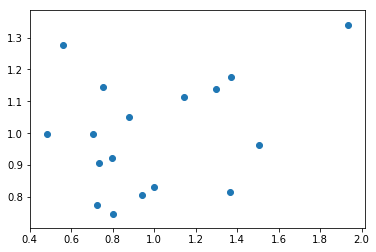

(0.32538444252901866, 0.20251079625937049)
eyes


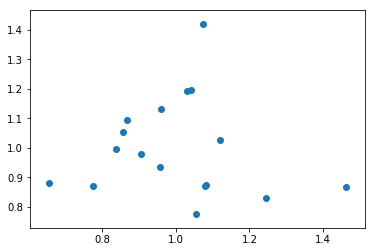

(-0.075550642396938011, 0.77320295656781224)
lips


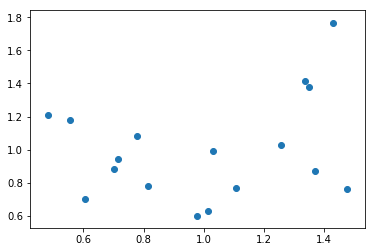

(0.26069646897650539, 0.31219765174992009)
nose


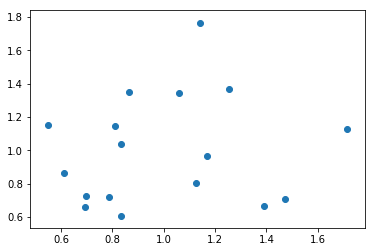

(0.1335342706240224, 0.60939528508504004)
trial 3 #############################################
eye brows


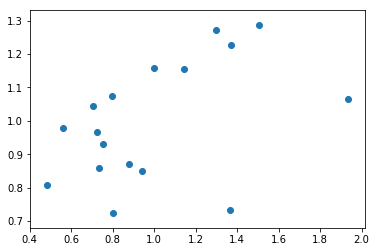

(0.46841405639240263, 0.057903605880356729)
eyes


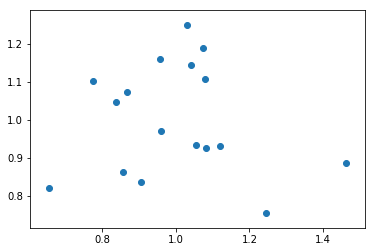

(-0.096625501513369336, 0.71219002615945071)
lips


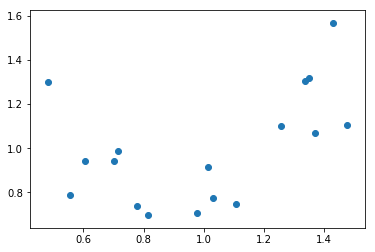

(0.46375850575938593, 0.060783232460075991)
nose


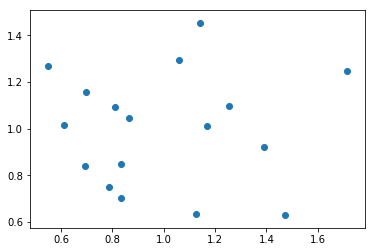

(0.0081695123763117269, 0.97517517937102483)
trial 4 #############################################
eye brows


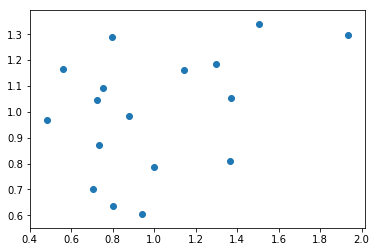

(0.38384974977160896, 0.12824213667017337)
eyes


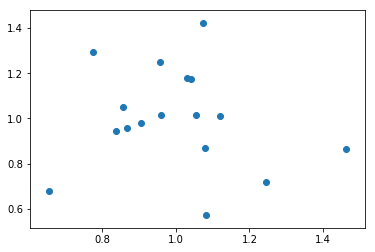

(-0.13041137304227995, 0.6178618890286498)
lips


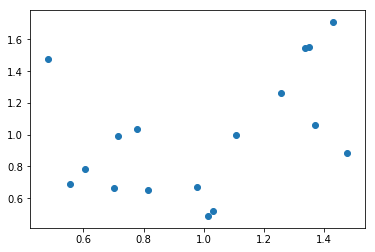

(0.4093681211536247, 0.10273415750753277)
nose


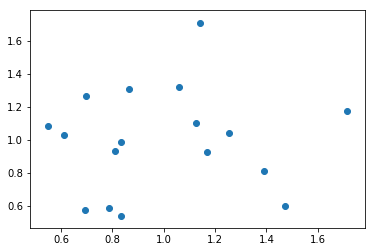

(0.076462814482550379, 0.77053318533477055)
trial 5 #############################################
eye brows


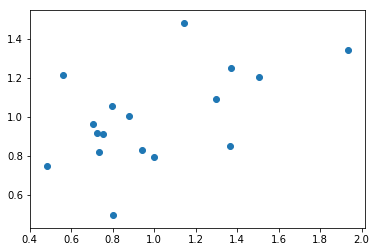

(0.52520160388480019, 0.030395143205769418)
eyes


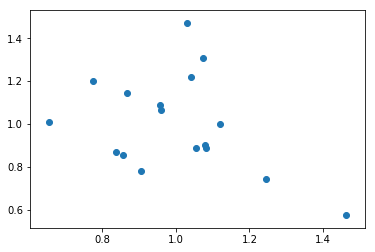

(-0.36679915276602232, 0.14755933716622996)
lips


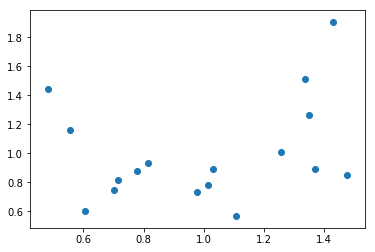

(0.27943544393462943, 0.27738789961673105)
nose


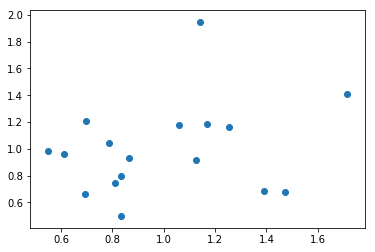

(0.2484754365259845, 0.33622405204905842)
trial 6 #############################################
eye brows


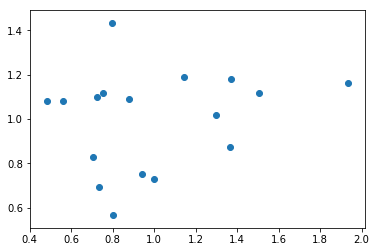

(0.19335012787649597, 0.45715462532902673)
eyes


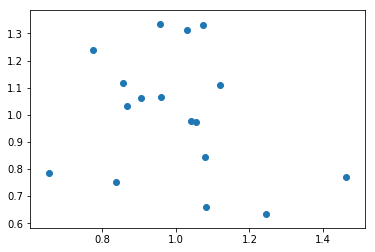

(-0.25308868002154294, 0.32703244308183888)
lips


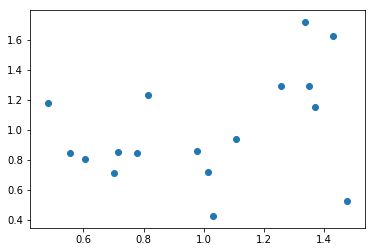

(0.35509072253186752, 0.16192209677926475)
nose


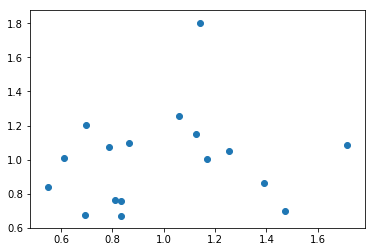

(0.16602928084292456, 0.52421728647492583)
trial 7 #############################################
eye brows


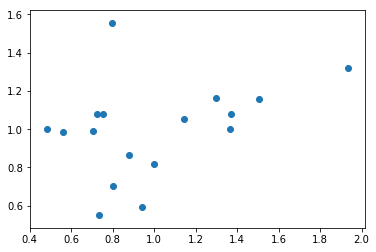

(0.35139847423860598, 0.16664057709994856)
eyes


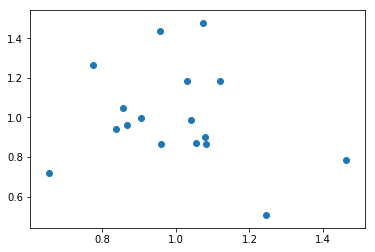

(-0.20299702301660483, 0.4345587867829811)
lips


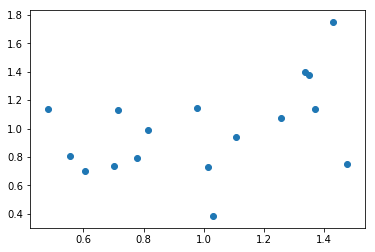

(0.42164797273200866, 0.091845053480520369)
nose


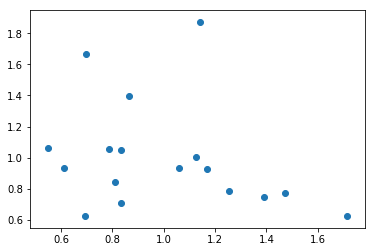

(-0.27792360067606942, 0.28010461614013593)
trial 8 #############################################
eye brows


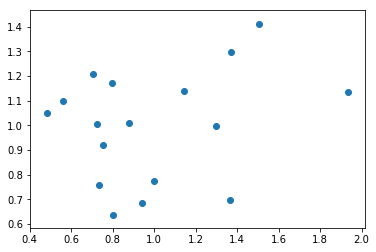

(0.25821596602782182, 0.31699015048200113)
eyes


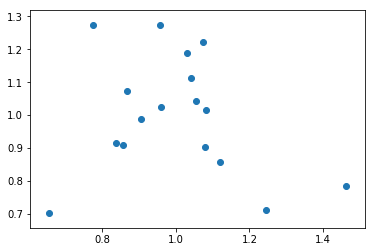

(-0.21841777780973975, 0.39967434530123414)
lips


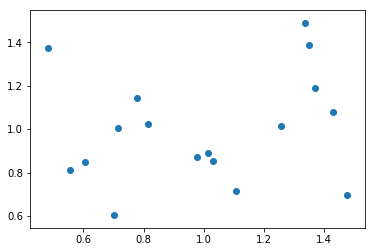

(0.19587733793326956, 0.45117877876129175)
nose


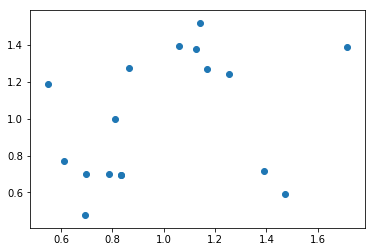

(0.33704097959704993, 0.18586457666685183)
trial 9 #############################################
eye brows


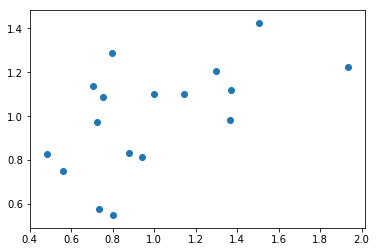

(0.56791977940214011, 0.017397222299824138)
eyes


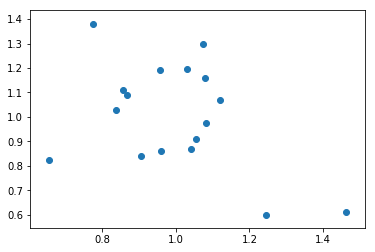

(-0.43242480756676377, 0.082994995054431295)
lips


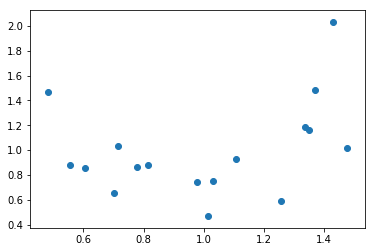

(0.31598842710627545, 0.21661529220139933)
nose


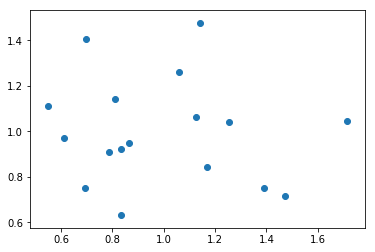

(-0.10964540843061792, 0.67528061078798418)
trial 10 #############################################
eye brows


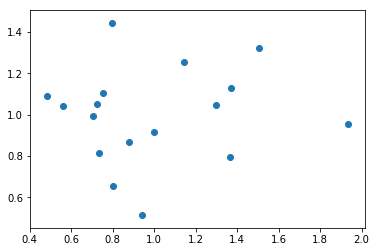

(0.07819492443652884, 0.76547031770134788)
eyes


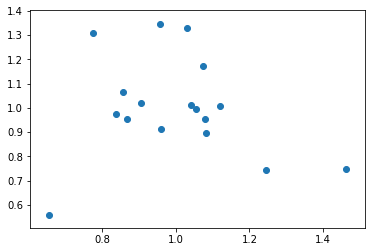

(-0.15108508309247912, 0.56270395482200208)
lips


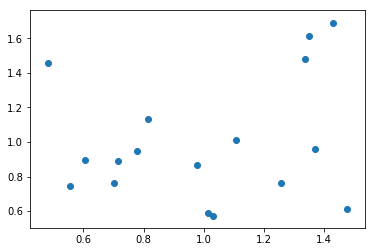

(0.21664970471422537, 0.40359542535420512)
nose


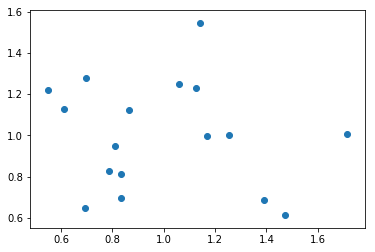

(-0.14045247232045474, 0.59080631365811864)
trial 11 #############################################
eye brows


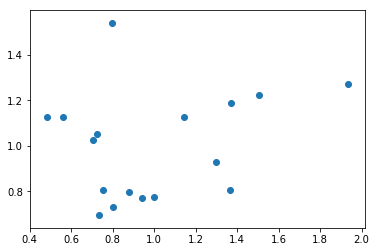

(0.22863206594431057, 0.37742781860304842)
eyes


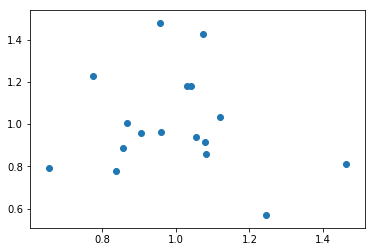

(-0.1541431063678281, 0.55473015256032521)
lips


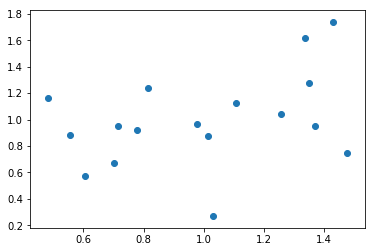

(0.37481859909691584, 0.13824081365208998)
nose


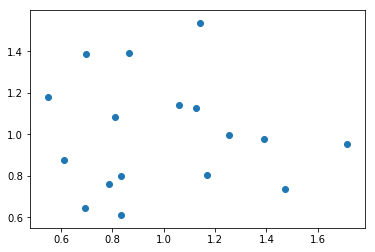

(-0.041038722830239932, 0.87573083760886328)


In [38]:
for _ in range(2,12):
    folder = 'saliency masks'
    fname = 'true_class_saliency_mask_trial{}_10.pkl'.format(_)
    with open(os.path.join(folder, fname), "rb") as handle:
        true_saliencies = _pickle.load(handle) 

    actor_true_saliencies = {}
    for actor in true_saliencies:
        if actor in bad_samples[_]:
            for index in bad_samples[_][actor]:
                true_saliencies[actor][index] = 0
            actor_saliency = np.sum(true_saliencies[actor], axis=0)/(15-len(bad_samples[_][actor]))
        else:
            actor_saliency = np.mean(true_saliencies[actor], axis=0)
        actor_true_saliencies[actor] = actor_saliency
    
    
    scores = {}
    deviations = {}
    for actor in test_set.keys():
        scores[actor] = {}
        deviations[actor] = {}
        for feature in features:
            scores[actor][feature] = score(feature, mc_rectangle_samples, actor_true_saliencies[actor])

    for feature in features:
        feature_scores = [scores[actor][feature] for actor in test_set.keys()]
        avg_feature_score = sum(feature_scores)/len(feature_scores)
        for actor in test_set.keys():
            deviations[actor][feature] = scores[actor][feature]/avg_feature_score
    
    
    
    from scipy.stats import pearsonr
    
    print('trial {} #############################################'.format(_))
    for feature in features:
        print(feature)
        turker_dev = np.array([turker_deviations[actor][feature] for actor in sorted(test_set.keys())])
        bp_dev = np.array([deviations[actor][feature] for actor in sorted(test_set.keys())])
        plt.scatter(turker_dev, bp_dev)
        plt.show()
        plt.close()
        print(pearsonr(turker_dev, bp_dev))

In [35]:
for actor in sorted(test_set.keys()):
    print(actor)
    turker_dev = np.array([turker_deviations[actor][feature] for feature in features])
    bp_dev = np.array([deviations[actor][feature] for feature in features])
    print(pearsonr(turker_dev, bp_dev))

Alec Baldwin
(0.03525357578444429, 0.94018885421186271)
America Ferrera
(0.40834434357515104, 0.36309342878927864)
Angie Harmon
(0.59812818576727533, 0.15600850867655552)
Anne Hathaway
(-0.17336493382819851, 0.71008939017573236)
Bill Hader
(-0.27477995279867412, 0.55092837340826917)
Cheryl Hines
(0.16976090115954412, 0.71593964240612906)
Daniel Radcliffe
(0.70341991658490377, 0.077817021610498971)
Fran Drescher
(0.038941033450798551, 0.93394176048086064)
Gerard Butler
(0.23850752699701563, 0.60651472223417646)
Jennifer Aniston
(0.72604563480778739, 0.064676087258477413)
Kristin Chenoweth
(-0.10337909720100659, 0.82543450323993206)
Lorraine Bracco
(0.25433015882394006, 0.58206324520766273)
Matt Damon
(0.84755142636244063, 0.016026537730649864)
Michael Vartan
(0.62589128580593467, 0.13269687467156938)
Nicolas Cage
(0.37507274603173335, 0.40708347350106189)
Selena Gomez
(0.17741396573352322, 0.70353027619734576)
Steve Carell
(-0.3939558486378506, 0.38186745266003924)
